<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_09_4_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks

**Module 9: Facial Recognition**

- Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
- For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).


# Module 9 Material

- Part 9.1: Detecting Faces in an Image [[Video]](https://www.youtube.com/watch?v=Hpp3D3P2iWQ&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_1_faces.ipynb)
- Part 9.2: Detecting Facial Features [[Video]](https://www.youtube.com/watch?v=AblTbq0T2wE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_2_face_features.ipynb)
- Part 9.3: Reality Augmentation [[Video]](https://www.youtube.com/watch?v=jfZDiRxx5Bc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_3_reality_augmentation.ipynb)
- **Part 9.4: Application: Emotion Detection** [[Video]](https://www.youtube.com/watch?v=F0H6vojQhE8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_4_emotion.ipynb)
- Part 9.5: Application: Blink Efficiency [[Video]](https://www.youtube.com/watch?v=96LPEStHCUA&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_5_blink.ipynb)


# Google CoLab Instructions

The following code checks that Google CoLab is and sets up the correct hardware settings for PyTorch.


In [ ]:
try:
    import google.colab
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Part 9.4: Application: Emption Detection

The Python **fer** package stands for "Facial Emotion Recognition" and is a potent tool that harnesses the capabilities of computer vision to detect emotions in people's faces. By analyzing facial features and expressions, the package can identify a range of emotions, such as happiness, sadness, surprise, and anger, among others. Leveraging this technology has wide-reaching applications. For instance, marketers can use it to gauge real-time reactions of consumers to advertisements or new product launches. In the realm of entertainment, filmmakers and game developers can adjust content based on the viewers' emotional feedback. Additionally, in the healthcare sector, it can assist in monitoring patients' emotional well-being. As we delve deeper, we will be exploring how to employ the **fer** package to tap into these vast opportunities and detect emotions effectively.

We begin by installing the *fer** package.


In [ ]:
!pip install fer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=ee3438be50c9d7971ac9a561e390b3c0145f3a0535f75c2c84e036c274bebd65
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


We begin by loading an image and displaying it. We utilize OpenCV to both load and display this image.

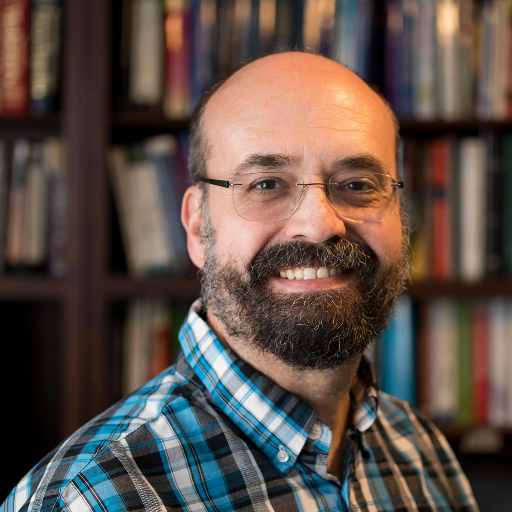

In [ ]:
import requests
import cv2
import numpy as np
from PIL import Image, ImageDraw
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow

url = "https://data.heatonresearch.com/images/jeff/about-jeff-heaton-2020.jpg"

# Download the image using requests
response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
response.raise_for_status()

# Convert the downloaded bytes to a numpy array
image = np.asarray(bytearray(response.content), dtype="uint8")

# Decode the numpy array to an OpenCV image
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Display
(h, w) = img.shape[:2]
d = cv2.resize(img, (512, int(h*512/w)))
cv2_imshow(d)

We are now ready to make use of **fer** to interpret the emption of the image.

In [ ]:
from fer import FER
import cv2

detector = FER()
detector.detect_emotions(img)[0]

{'box': array([  7, 158,  57,  57], dtype=int32),
 'emotions': {'angry': 0.32,
  'disgust': 0.0,
  'fear': 0.08,
  'happy': 0.27,
  'sad': 0.16,
  'surprise': 0.01,
  'neutral': 0.15}}

We can easily try a different image to see what emotion is detected.

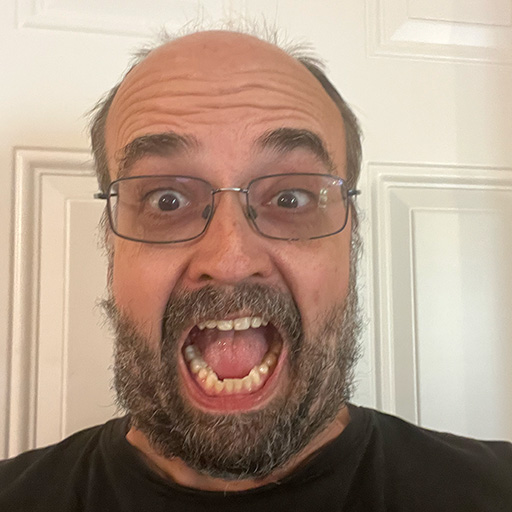

In [ ]:
url = "https://data.heatonresearch.com/images/wustl/data/jeff-emotion.jpg"

# Download the image using requests
response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
response.raise_for_status()

# Convert the downloaded bytes to a numpy array
image = np.asarray(bytearray(response.content), dtype="uint8")

# Decode the numpy array to an OpenCV image
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Display
(h, w) = img.shape[:2]
d = cv2.resize(img, (512, int(h*512/w)))
cv2_imshow(d)

Here we see a mix of fear and surprise.

In [ ]:
from fer import FER
import cv2

detector = FER()
detector.detect_emotions(img)[0]

{'box': array([ 70,  84, 322, 322], dtype=int32),
 'emotions': {'angry': 0.18,
  'disgust': 0.0,
  'fear': 0.36,
  'happy': 0.22,
  'sad': 0.01,
  'surprise': 0.23,
  'neutral': 0.0}}